In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from altair import *
from nltk import tokenize
from nltk.corpus import stopwords
import string
import collections
import wordcloud as WordCloud
import ggplot
from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib.patches import Polygon
import shapefile

/usr/local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/usr/local/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3943: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  lats = lats[:,nx/2]


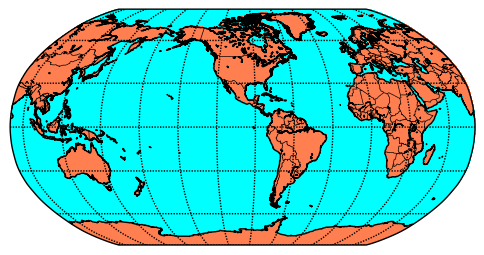

In [3]:
my_map = Basemap(projection = 'robin', lat_0= 50, lon_0=-100,resolution = 'l')
my_map.drawcoastlines()
my_map.drawcountries()
#my_map.fillcontinents(color = 'coral', lake_color = 'aqua')
#my_map.drawmapboundary(fill_color = 'aqua')
my_map.drawlsmask(land_color = 'coral', ocean_color = 'aqua')
#my_map.bluemarble()
my_map.drawparallels(np.arange(-90,90,30))
my_map.drawmeridians(np.arange(0,360,30))
plt.show()

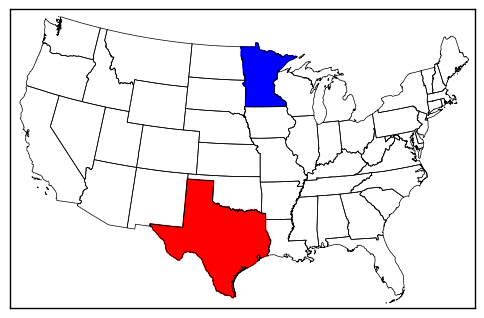

In [4]:
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.readshapefile('/home/faculty/millbr02/pub/st99_d00',name='states',drawbounds=True)
state_names=[]
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])
    
ax = plt.gca()
seg = map.states[state_names.index('Texas')]
poly = Polygon(seg,facecolor='red',edgecolor='red')
ax.add_patch(poly)

seg = map.states[state_names.index('Minnesota')]
poly = Polygon(seg,facecolor='blue',edgecolor='blue')
ax.add_patch(poly)
plt.show()

In [5]:
#r = shapefile.Reader(r"/home/faculty/millbr02/pub/gadm28/gadm28")
#shapes = r.shapes()
#records = r.records()


In [9]:
s= shapefile.Reader(r"/home/faculty/millbr02/pub/BEL_adm3")
shapes = s.shapes()
records = s.records()

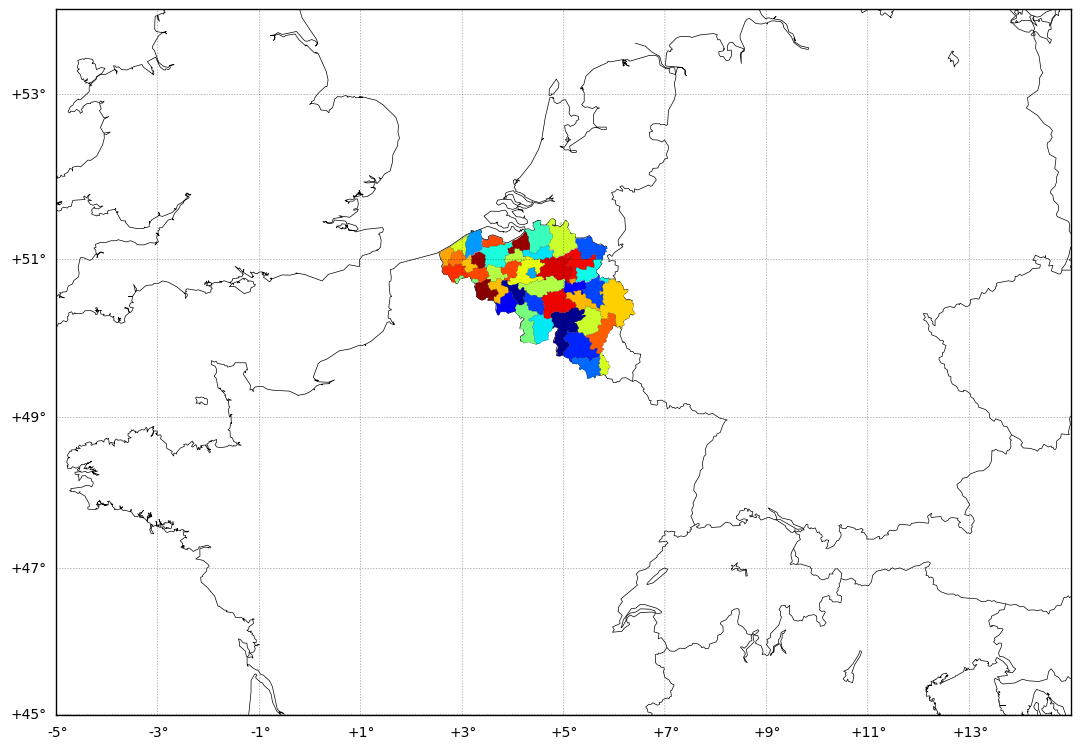

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

### PARAMETERS FOR MATPLOTLIB :
import matplotlib as mpl
mpl.rcParams['font.size'] = 10.
#mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 6.
mpl.rcParams['ytick.labelsize'] = 6.

fig = plt.figure(figsize=(11.7,8.3))
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
#Let's create a basemap of Europe
x1 = -5.0
x2 = 15.
y1 = 45.
y2 = 54.

m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',dashes=[1,1],labelstyle='+/-',linewidth=0.2) # draw parallels
m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',dashes=[1,1],labelstyle='+/-',linewidth=0.2) # draw meridians

from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile

r = shapefile.Reader(r"/home/faculty/millbr02/pub/BEL_adm3")
shapes = r.shapes()
records = r.records()

for record, shape in zip(records,shapes):
    lons,lats = zip(*shape.points)
    data = np.array(m(lons, lats)).T
    
    if len(shape.parts) == 1:
        segs = [data,]
    else:
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])
 
    lines = LineCollection(segs,antialiaseds=(1,))
    lines.set_facecolors(cm.jet(np.random.rand(1)))
    lines.set_edgecolors('k')
    lines.set_linewidth(0.1)
    ax.add_collection(lines)
 
plt.savefig('tutorial10.png',dpi=300)
plt.show()